In [1]:
import graphlab

In [2]:
loans = graphlab.SFrame('lending-club-data.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\DHAVAL~1\AppData\Local\Temp\graphlab_server_1497707054.log.0


This non-commercial license of GraphLab Create for academic use is assigned to dhavalp576@gmail.com and will expire on May 27, 2018.


In [3]:
loans.column_names()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'is_inc_v',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'not_compliant',
 'status',
 'inactive_loans',
 'bad_loans',
 'emp_length_num',
 'grade_num',
 'sub_grade_num',
 'delinq_2yrs_zero',
 'pub_rec

In [4]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.remove_column('bad_loans')

In [5]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [6]:
loans, loans_with_na = loans[[target] + features].dropna_split()

# Count the number of rows with missing data
num_rows_with_na = loans_with_na.num_rows()
num_rows = loans.num_rows()
print 'Dropping %s observations; keeping %s ' % (num_rows_with_na, num_rows)

Dropping 29 observations; keeping 122578 


In [7]:
safe_loans_raw = loans[loans[target] == 1]
risky_loans_raw = loans[loans[target] == -1]

# Undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
safe_loans = safe_loans_raw.sample(percentage, seed = 1)
risky_loans = risky_loans_raw
loans_data = risky_loans.append(safe_loans)

print "Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data))
print "Percentage of risky loans                :", len(risky_loans) / float(len(loans_data))
print "Total number of loans in our new dataset :", len(loans_data)

Percentage of safe loans                 : 0.502247166849
Percentage of risky loans                : 0.497752833151
Total number of loans in our new dataset : 46503


In [8]:
categorical_variables = []
for feat_name, feat_type in zip(loans_data.column_names(), loans_data.column_types()):
    if feat_type == str:
        categorical_variables.append(feat_name)

for feature in categorical_variables:
    loans_data_one_hot_encoded = loans_data[feature].apply(lambda x: {x: 1})
    loans_data_unpacked = loans_data_one_hot_encoded.unpack(column_name_prefix=feature)

    # Change None's to 0's
    for column in loans_data_unpacked.column_names():
        loans_data_unpacked[column] = loans_data_unpacked[column].fillna(0)

    loans_data.remove_column(feature)
    loans_data.add_columns(loans_data_unpacked)

loans_data.column_names()

['safe_loans',
 'sub_grade_num',
 'short_emp',
 'emp_length_num',
 'dti',
 'payment_inc_ratio',
 'delinq_2yrs',
 'delinq_2yrs_zero',
 'inq_last_6mths',
 'last_delinq_none',
 'last_major_derog_none',
 'open_acc',
 'pub_rec',
 'pub_rec_zero',
 'revol_util',
 'total_rec_late_fee',
 'int_rate',
 'total_rec_int',
 'annual_inc',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'grade.A',
 'grade.B',
 'grade.C',
 'grade.D',
 'grade.E',
 'grade.F',
 'grade.G',
 'home_ownership.MORTGAGE',
 'home_ownership.OTHER',
 'home_ownership.OWN',
 'home_ownership.RENT',
 'purpose.car',
 'purpose.credit_card',
 'purpose.debt_consolidation',
 'purpose.home_improvement',
 'purpose.house',
 'purpose.major_purchase',
 'purpose.medical',
 'purpose.moving',
 'purpose.other',
 'purpose.small_business',
 'purpose.vacation',
 'purpose.wedding']

In [9]:
train_data, validation_data = loans_data.random_split(.8, seed=1)

In [10]:
train_output = train_data['safe_loans']
del train_data['safe_loans']

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
import numpy as np

In [13]:
grd = GradientBoostingClassifier(max_depth=6, n_estimators=5)

In [14]:
train_data.to_numpy()

array([[  0.8,   1. ,   1. , ...,   0. ,   0. ,   0. ],
       [  0.4,   0. ,   5. , ...,   1. ,   0. ,   0. ],
       [  1. ,   1. ,   1. , ...,   0. ,   0. ,   0. ],
       ..., 
       [  0.2,   0. ,  11. , ...,   0. ,   0. ,   0. ],
       [  0.6,   0. ,  11. , ...,   0. ,   0. ,   0. ],
       [  1. ,   0. ,   3. , ...,   0. ,   0. ,   0. ]])

In [15]:
X = train_data.to_numpy()
Y = train_output.to_numpy()
grd.fit(X,Y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [16]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data_y = sample_validation_data['safe_loans']
del sample_validation_data['safe_loans']

In [17]:
grd.predict(sample_validation_data.to_numpy())

array([ 1,  1, -1,  1], dtype=int64)

In [18]:
sample_validation_data_y

dtype: int
Rows: 4
[1L, 1L, -1L, -1L]

In [19]:
grd.predict_proba(sample_validation_data.to_numpy())[:,1]

array([ 0.58357669,  0.53050311,  0.46192208,  0.60408361])

In [20]:
validation_data_y = validation_data['safe_loans'].to_numpy()
del validation_data['safe_loans']
validation_data_x = validation_data.to_numpy()
validation_accuracy = grd.score(validation_data_x, validation_data_y)

In [21]:
print validation_accuracy

0.661460577337


In [22]:
predicted_valid = grd.predict(validation_data_x)

In [31]:
FP = np.array([1 if (predict == 1 and actual == -1) else 0 for (predict, actual) in zip (predicted_valid, validation_data_y)]).sum()

In [32]:
FP

1652

In [33]:
FN = np.array([1 if (predict == -1 and actual == +1) else 0 for (predict, actual) in zip (predicted_valid, validation_data_y)]).sum()

In [34]:
FN

1491

In [35]:
cost = (FP * 20000 + FN * 10000)
print cost

47950000


In [46]:
validation_data['probability_prediction'] = grd.predict_proba(validation_data_x)[:,1]

In [49]:
validation_data = validation_data.sort(sort_columns='probability_prediction', ascending=False)

In [51]:
validation_data.head(5)

sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths
0.4,0,4,12.73,12.167,0,1,1
0.2,0,2,0.62,4.56538,0,1,0
0.2,0,5,8.16,2.46989,0,1,0
0.2,0,11,8.37,1.02953,0,1,0
0.4,0,2,9.18,4.26159,0,1,1
last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate
1,1,6,0,1,30.5,18.2281,5.99
1,1,4,0,1,5.8,0.0,6.03
1,1,15,0,1,4.7,0.0,5.42
1,1,15,0,1,9.9,0.0,6.39


In [52]:
validation_data_asc = validation_data.sort(sort_columns='probability_prediction')

In [53]:
validation_data_asc.head(5)

sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths
0.8,0,2,8.66,17.6251,0,1,0
0.8,1,1,7.37,16.6207,0,1,1
1.0,0,3,8.53,14.628,0,1,0
0.8,0,9,8.54,7.48113,0,1,2
0.4,0,3,21.9,7.1876,1,0,4
last_delinq_none,last_major_derog_none,open_acc,pub_rec,pub_rec_zero,revol_util,total_rec_late_fee,int_rate
1,1,8,0,1,64.4,92.52,16.29
1,1,8,0,1,32.6,24.93,16.29
1,1,6,0,1,79.5,54.709,14.22
0,1,8,0,1,51.3,0.0,16.29


In [54]:
model_10 = GradientBoostingClassifier(max_depth=6, n_estimators=10)
model_10.fit(X,Y)
model_50 = GradientBoostingClassifier(max_depth=6, n_estimators=50)
model_50.fit(X,Y)
model_100 = GradientBoostingClassifier(max_depth=6, n_estimators=100)
model_100.fit(X,Y)
model_200 = GradientBoostingClassifier(max_depth=6, n_estimators=200)
model_200.fit(X,Y)
model_500 = GradientBoostingClassifier(max_depth=6, n_estimators=500)
model_500.fit(X,Y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [55]:
accuracy_10 = model_10.score(validation_data_x, validation_data_y)
accuracy_50 = model_50.score(validation_data_x, validation_data_y)
accuracy_100 = model_100.score(validation_data_x, validation_data_y)
accuracy_200 = model_200.score(validation_data_x, validation_data_y)
accuracy_500 = model_500.score(validation_data_x, validation_data_y)


print("accuracy for model_10 is %f" % accuracy_10)
print("accuracy for model_50 is %f" % accuracy_50)
print("accuracy for model_100 is %f" % accuracy_100)
print("accuracy for model_200 is %f" % accuracy_200)
print("accuracy for model_500 is %f" % accuracy_500)

accuracy for model_10 is 0.666308
accuracy for model_50 is 0.685265
accuracy for model_100 is 0.690220
accuracy for model_200 is 0.686234
accuracy for model_500 is 0.689143


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [57]:
train_err_10 = 1 - model_10.score(X, Y)
train_err_50 = 1 - model_50.score(X, Y)
train_err_100 = 1 - model_100.score(X, Y)
train_err_200 = 1 - model_200.score(X, Y)
train_err_500 = 1 - model_500.score(X, Y)

In [58]:
validation_err_10 = 1 - model_10.score(validation_data_x, validation_data_y)
validation_err_50 = 1 - model_50.score(validation_data_x, validation_data_y)
validation_err_100 = 1 - model_100.score(validation_data_x, validation_data_y)
validation_err_200 = 1 - model_200.score(validation_data_x, validation_data_y)
validation_err_500 = 1 - model_500.score(validation_data_x, validation_data_y)

In [59]:
training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]
validation_errors = [validation_err_10, validation_err_50, validation_err_100, validation_err_200, validation_err_500]

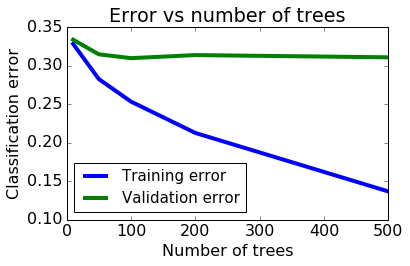

In [60]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')